<a href="https://colab.research.google.com/github/phongloihong/image-depth-estimation/blob/main/Image_Depth_Window_based_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
!gdown 1y6EIBl78gwOUG0qEcg6jzgaOqjgJVWk3
!unzip /content/Aloe.zip -d /content/aloe

Downloading...
From: https://drive.google.com/uc?id=1y6EIBl78gwOUG0qEcg6jzgaOqjgJVWk3
To: /content/Aloe.zip
100% 1.32M/1.32M [00:00<00:00, 10.6MB/s]
Archive:  /content/Aloe.zip
  inflating: /content/aloe/Aloe/Aloe_left_1.png  
  inflating: /content/aloe/Aloe/Aloe_right_3.png  
  inflating: /content/aloe/Aloe/Aloe_right_1.png  
  inflating: /content/aloe/Aloe/Aloe_right_2.png  
  inflating: /content/aloe/Aloe/Disparity_map_corr.png  


In [23]:
LEFT_IMAGE = '/content/aloe/Aloe/Aloe_left_1.png'
RIGHT_IMAGE = '/content/aloe/Aloe/Aloe_right_1.png'
SCALE = 3
MAX_VALUE = 255 * 9
DISPARITY_RANGE = 64
KERNAL_SIZE = 3
KERNAL_HALF = int((KERNAL_SIZE - 1) / 2)

left = cv2.imread(LEFT_IMAGE, 0).astype(np.float32)
right = cv2.imread(RIGHT_IMAGE, 0).astype(np.float32)

hight, width = left.shape[:2]
dept = np.zeros((hight, width))

In [17]:
def l1_distance(x, y):
  return abs(x - y)

def l2_distance(x,y):
  return (x - y) ** 2

In [26]:
def get_depth_by_window_based_matching(height, width):
  depth = np.zeros((height, width), np.uint8)
  for y in range(KERNAL_HALF, height - KERNAL_HALF):
    for x in range(KERNAL_HALF, width - KERNAL_HALF):

      disparity = 0
      cost_min = 65534

      for j in range(DISPARITY_RANGE):
        total = 0
        value = 0

        for v in range(-KERNAL_HALF, KERNAL_HALF + 1):
          for u in range(-KERNAL_HALF, KERNAL_HALF + 1):
            value = MAX_VALUE
            if (x + u  - j) >= 0:
              value = l2_distance(int(left[y + v, x + u]), int(right[y + v, (x + u) -j]))
            total += value

        if total < cost_min:
          cost_min = total
          disparity = j

      depth[y, x] = disparity * SCALE
  return depth

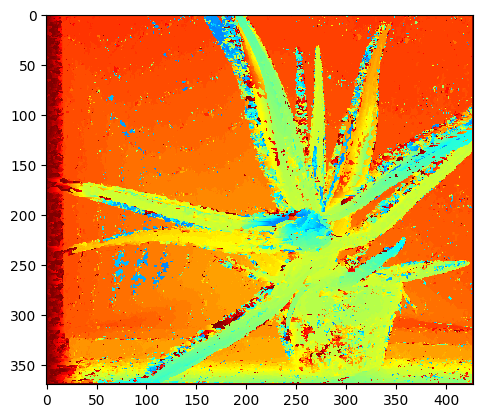

In [27]:
depth = get_depth_by_window_based_matching(hight, width)
color_depth = cv2.applyColorMap(depth, cv2.COLORMAP_JET)
plt.imshow(color_depth, interpolation='nearest')
plt.show()

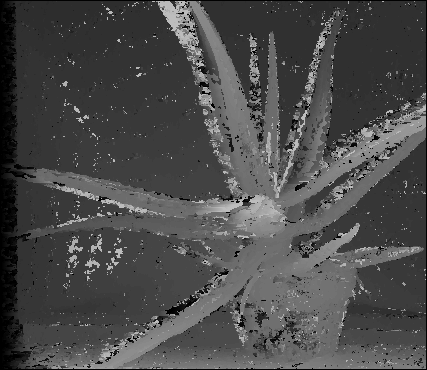

In [29]:
cv2_imshow(depth)